# Clean Notebook

Todo:
- Copy Code from midterm
- write loop
- write function
- clean up

## Maggie's Stuff

# Housekeeping

Step One: Imports! <br>
Step Two: Create a list of FIPs codes that we can use for multiple maps --> Defined as "Our_FIPs"<br>

In [5]:
# import everything we need

import pandas as pd
import geopandas as gpd

import plotly.express as px
import osmnx as ox
import contextily as ctx
import matplotlib.pyplot as plt
import xyzservices.providers as xyz

## Set up some variables
Our_FIPs = [ '06025012301','06025010200',
               '06025010300','06025010400',
               '06025010500','06025010600',
               '06025010700','06025011000',
               '06025011300','06025011400',
               '06025011802','06025011202',
               '06025011201','06025010900',
               '06025010800','06025010300',
               '06025012400','06025010101',
               '06065045604','06065046900',
               '06065045609','06065045606',
               '06065940400','06065045216',
               '06065045304','06065045707',
               '06065045609','06065045605',
               '06065045608','06065045224',
               '06065045606','06065045608',
               '06065045605','06065044403',
               '06073021000','06025012301',
               '06065045605','06025011900',
               '06025011100','06025012302',
               '06025010102','06025011803',
               '06025011600','06025011801',
               '06025012200','06025012100',
               '06025012002','06025011700',
               '06025011500','06065045706',
               '06065045703','6065045705',
               '06065045704'
             ]

## Renewable Energy Development
Step One: Pull all data on power plants from open street map using set coordinates as geographic parameter and define that new data set as "osm_power"
Step Two: Set the crs to espg=4236
Steo Three: Plot osm_power
Step Four: Add the Esri.WorldImagry basemap

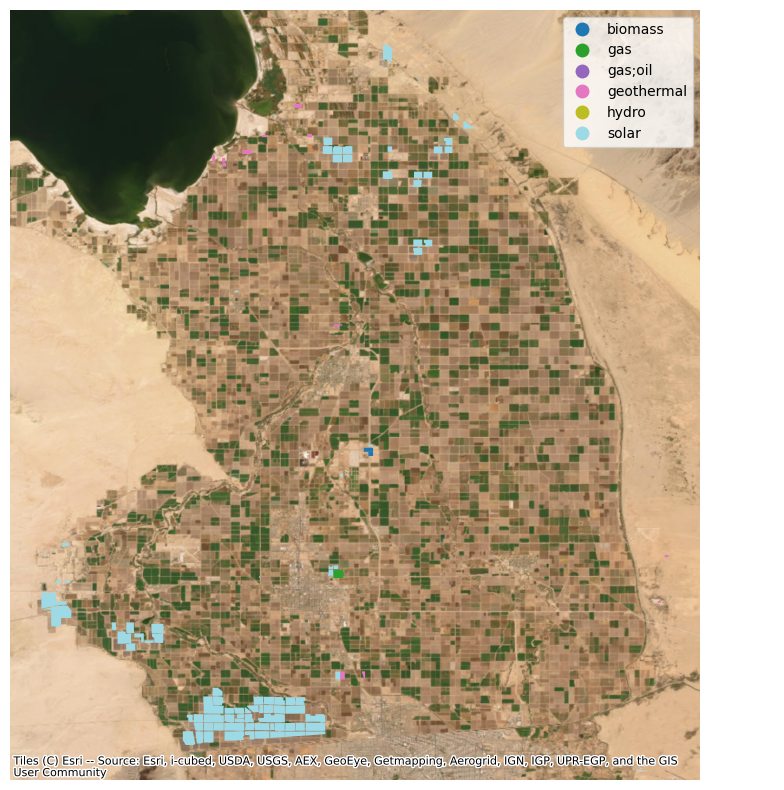

In [6]:
#Step One:
osm_power = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'power':'plant'})

#Step Two: 
osm_power = osm_power.to_crs(epsg=4236)
fig, ax = plt.subplots(figsize=(10,10))

#Step Three:
osm_power.plot(ax=ax,
         column='plant:source',
         cmap='tab20',
         legend=True)
ax.axis('off')

#Step Four: 
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

## Waterways in the Imperial Valley
Step One: Pull all data on waterways from open street map using set coordinates as geographic parameter and define that new data set as "osm_water" <br>
Step Two: Set the crs to espg=4236 <br>
Steo Three: Plot osm_water <br>
Step Four: Add the Esri.WorldImagry basemap

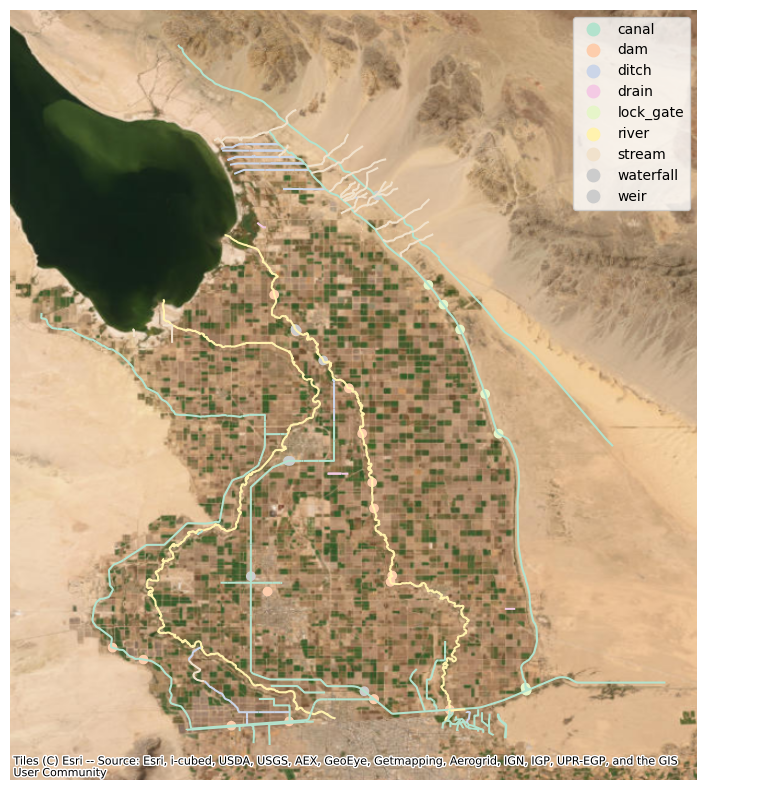

In [7]:

#Step One
osm_water = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'waterway':True})

#Step Two:
osm_water = osm_water.to_crs(epsg=4236)

#Step Three:
fig, ax = plt.subplots(figsize=(10,10))
osm_water.plot(ax=ax,
         column='waterway',
         cmap='Pastel2',
         legend=True)
ax.axis('off')

#Step Four:
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

## Asthma Mapping
Step One: Get the asthma data from calenviroscreen data<br>
Step Two: Clean up the FIPs Codes by changing to strings and adding leading zeros<br>
Step Three: Create a geodataframe that is just made up of the FIPs codes / census tracts we defined under above (see housekeeping)<br>
Step Four: Plot 'AsthmaP' variable from CalEnviroScreen over the Esri.WorldImgry Map <br>

- 'AsthmaP' variable describes how the rates in a given tract compares to other tracts across the state (percentile) <br>
- For example, a dark region in the 90th percentile means that the rates in that tract are higher than 90% of all other tracts<br>

Step Five: Plot Asthma variable from CalEnviroscreen over the Esri.WorldImagry Map <br>
- 'Asthma' variable is the number of trips to the emergency department per 10,000 people

(-116.98409285041606,
 -114.32948814952228,
 32.54557930245018,
 34.15294612860471)

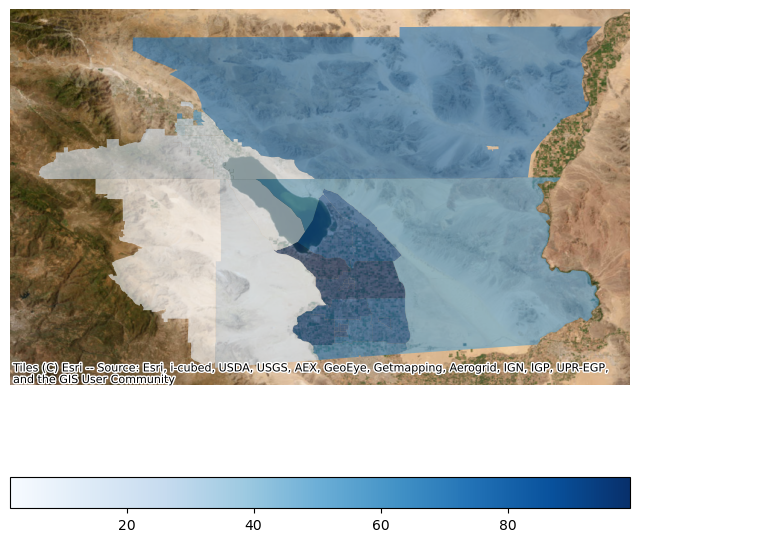

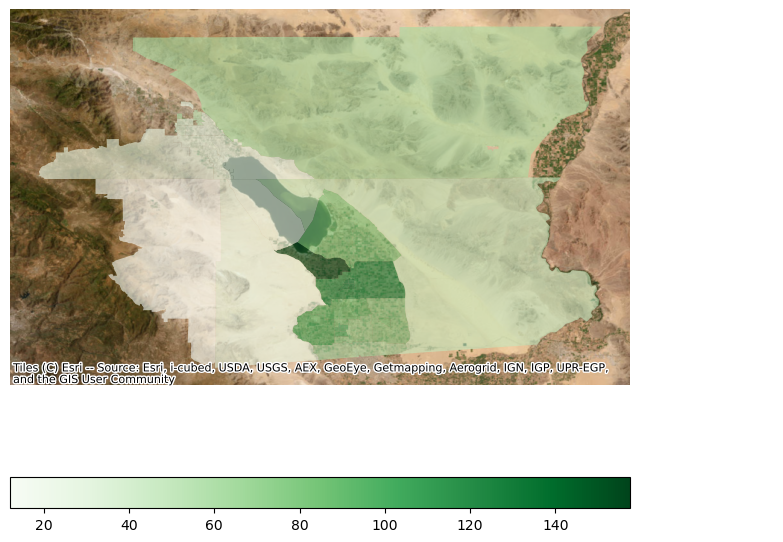

In [8]:
#Step One: 
calenviro_file = "data/CalEnviroScreen/calenviroscreen.zip"
calenviro = gpd.read_file(calenviro_file)

#Step Two:
calenviro['Tract'] = calenviro['Tract'].astype('int')
calenviro['Tract'] = calenviro['Tract'].astype('str')
calenviro["Tract"] = calenviro["Tract"].str.zfill(11)

#Step Three:
calenv_gdf= calenviro[calenviro['Tract'].isin(Our_FIPs)]

# Step Four:
calenv_gdf = calenv_gdf.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
calenv_gdf.plot(ax=ax,
               column='AsthmaP',
               legend=True,
               cmap='Blues',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

#Step Five:
calenv_gdf = calenv_gdf.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
calenv_gdf.plot(ax=ax,
               column='Asthma',
               legend=True,
               cmap='Greens',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

## Seth's Landcover Stuff

In [ ]:
#import necessary packages
# Rasterio documentation can be found at https://rasterio.readthedocs.io/en/latest/

import numpy as np
import rasterio
import rasterio.plot
import pandas as pd


# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

import contextily as ctx

years = [2004, 2019] # create a list of the comparison years to loop over
data = {} # Create an empty dictionary to save the raster dataset to 
data_masked = {} # Create empty dictionary to save masked numpy array to

#Loop through years specified to create data needed to plot
for year in years:
    data[year] = rasterio.open(f'data/NLCD/NLCD_{str(year)}_Land_Cover_L48_20210604_gyGbthZM9gweVLuKaW5e.tiff') # open raster and create element in 'data' dict.
    data_masked[year] = np.ma.masked_where(data[year].read(1)!=11, data[year].read(1)) # mask raster to show only were data is '11' (Open Water)


# ### Mapping Change in Water Cover
# 
# Now that we have our data prepared and masked we can overlay the 2004 and 2019 data we can overlay them to highlight the areas where there used to be water but is now dry lakebed.

# %%
fig, ax = plt.subplots(figsize=(15,10)) # create a figure and axis object to map onto and set the figure size.
plt.imshow(data_masked[years[1]], extent=rasterio.plot.plotting_extent(data[years[1]]), cmap=ListedColormap(['blue']), zorder= 15) #plot data, set extent to geography, set color and drawing order
plt.imshow(data_masked[years[0]], extent=rasterio.plot.plotting_extent(data[years[0]]), cmap=ListedColormap(['red']), zorder= 10)

# creates legend items
handles = [
    Patch(color='red', label='2004 Water Area'),
    Patch(color='blue', label='2019 Water Area')
]

ctx.add_basemap(ax, crs=dataset_2019.read_crs(), source=ctx.providers.Esri.WorldImagery, zorder=5)
plt.axis('off')
plt.title('2004 and 2019 Open Water Area')
ax.legend(handles=handles)

plt.show()

# %% [markdown]
# This highlights the significant change in water area of the Salton Sea over this time period, but can we quantify it? 
# 
# We can with some numpy calculations! The individual pixel/cell size from NLCD is 30m by 30m, and we can count the number of cells of water in each year and calculate the difference.

# %%
count_19 = np.count_nonzero(data[2019].read(1) == 11)
count_04 = np.count_nonzero(data[2004].read(1) == 11)

sq_km = (count_04 - count_19)*900/1e6

print(f'The area surface area of water lost between 2004 and 2019 was {sq_km} square kilometers.')

# %% [markdown]
# That doesn't sound like a ton off the bat, but in perspective that is 12,793 football fields of area! That is a ton of water lost, and a ton of exposed dust and desert.
# 
# Now let's make a graph to see the land cover area for all categories side by side.

# %%
# Open the data dictionary and save it as a normal python dictionary for 

data_dict = pd.read_csv('data/NLCD/NLCD_landcover_legend_2018_12_17_gyGbthZM9gweVLuKaW5e.csv')
data_dict.dropna(axis=0, inplace=True) # Drop values with no legend information
legend = dict(zip(data_dict['Value'], data_dict['Legend'])) # save values and legend item as a dictionary for ease of use later.

# %%
# Create numpy arrays that are labeled instead of just as integers
labeled_data = {} #create an empty dict to fill
for year in years:
    labeled_data[year] = np.vectorize(legend.get)(data[year].read(1)) # fill dict item with np array where elements are labeled strings

# %%
# count cells of each land cover type for each year
counts_04 = np.unique(labeled_data[2004], return_counts=True)
counts_19 = np.unique(labeled_data[2019], return_counts=True)

# %%
# Create dataframe with landcover type and count for each year
df = pd.DataFrame(list(zip(counts_04[0],counts_04[1], counts_19[1])), columns=['landcover', '2004', '2019']) 
df['2004'] = df['2004']*900/1e6 # calculate as area in sq km
df['2019'] = df['2019']*900/1e6
df.head()

# %%
df_long = pd.melt(df, id_vars='landcover', value_vars=['2004','2019']) # convert to a "long" data frame that is better for plotting side by side

# %%
# Plot the land cover area as a bar chart side by side
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot( 
    ax=ax, data=df_long,
    x='landcover', y='value', hue='variable',
    palette='dark', alpha=.6,
)
plt.xlabel('Land Cover', fontsize=12)
plt.ylabel('Area of Land (square km)', fontsize=12)
plt.xticks(rotation=45)
ax.get_xaxis

## Miriam's Stuff

### Exploring the demographics of the populations living in Imperial County.
#### Looking at Household Income and Occupation data for Census Tracts in Imperial County.<br> 
Step 1: Get the income and occupation data from Social Explorer (ACS 2021)<br>
Step 2: Clean up data by fixing FIPS codes, parceling data into two dataframes in order to answer different questions about income and occupation. <br>
Step 3: Import shapefile with all the geodata and merge the file with the newly created occupation and income dataframes.<br>
Step 4: Plot Farming, Fishing and Forestry Occupation over the Esri.WorldImgry Map to see where those jobs are most concentrated as compared to the the plot of Management, Business, and Financial Operations  Occupations. The darker the colors on each map, the higher the percentage in the selected profession. <br>
Step 5: Plot % of each income bracket in census tracts immediately below and adjacent to the Salton Sea. 

In [ ]:
#import necessary libraries 
import pandas as pd
import geopandas as gpd

#import the ACS data from Social Explorer
df=pd.read_csv('data/occupation_income/new_data_clean_Notebook.csv')

# Convert Geo_FIPS to a string
df = pd.read_csv(
    'data/occupation_income/new_data_clean_Notebook.csv',
    dtype=
    {
        'Geo_FIPS':str,
     }
)

# add zeros to front of FIPS code
df['Geo_FIPS']=df['Geo_FIPS'].str.zfill(11)

#filter for columns that only have null values and then drop them. 
df.columns[df.isna().all()].tolist()
df = df.dropna(axis=1,how="all")

In [12]:
#import necessary libraries 
import pandas as pd
import geopandas as gpd

In [91]:
df=pd.read_csv('data/occupation_income/new_data_clean_Notebook.csv')

In [92]:
df.head()

Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  \
0      ACSSF         ca         140            0          3857     NaN   
1      ACSSF         ca         140            0          3858     NaN   
2      ACSSF         ca         140            0          3859     NaN   
3      ACSSF         ca         140            0          3860     NaN   
4      ACSSF         ca         140            0          3861     NaN   

   Geo_REGION  Geo_DIVISION  Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  \
0         NaN           NaN          NaN          6          25         NaN   
1         NaN           NaN          NaN          6          25         NaN   
2         NaN           NaN          NaN          6          25         NaN   
3         NaN           NaN          NaN          6          25         NaN   
4         NaN           NaN          NaN          6          25         NaN   

   Geo_PLACE  Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  \
0        NaN      10101         NaN         NaN         NaN           NaN   
1        NaN      10102         NaN         NaN         NaN           NaN   
2        NaN      10200         NaN         NaN         NaN           NaN   
3        NaN      10300         NaN         NaN         NaN           NaN   
4        NaN      10401         NaN         NaN         NaN           NaN   

   Geo_AIHHTLI  Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  \
0          NaN         NaN       NaN       NaN       NaN      NaN         NaN   
1          NaN         NaN       NaN       NaN       NaN      NaN         NaN   
2          NaN         NaN       NaN       NaN       NaN      NaN         NaN   
3          NaN         NaN       NaN       NaN       NaN      NaN         NaN   
4          NaN         NaN       NaN       NaN       NaN      NaN         NaN   

   Geo_MACC  Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  \
0       NaN       NaN        NaN         NaN           NaN     NaN   
1       NaN       NaN        NaN         NaN           NaN     NaN   
2       NaN       NaN        NaN         NaN           NaN     NaN   
3       NaN       NaN        NaN         NaN           NaN     NaN   
4       NaN       NaN        NaN         NaN           NaN     NaN   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_ZCTA5  Geo_SUBMCD  Geo_SDELM  \
0         NaN       NaN       NaN        NaN         NaN        NaN   
1         NaN       NaN       NaN        NaN         NaN        NaN   
2         NaN       NaN       NaN        NaN         NaN        NaN   
3         NaN       NaN       NaN        NaN         NaN        NaN   
4         NaN       NaN       NaN        NaN         NaN        NaN   

   Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_PUMA5           Geo_GEOID  \
0        NaN        NaN     NaN      NaN        NaN  14000US06025010101   
1        NaN        NaN     NaN      NaN        NaN  14000US06025010102   
2        NaN        NaN     NaN      NaN        NaN  14000US06025010200   
3        NaN        NaN     NaN      NaN        NaN  14000US06025010300   
4        NaN        NaN     NaN      NaN        NaN  14000US06025010401   

              Geo_NAME  Geo_BTTR  Geo_BTBG  \
0  Census Tract 101.01       NaN       NaN   
1  Census Tract 101.02       NaN       NaN   
2     Census Tract 102       NaN       NaN   
3     Census Tract 103       NaN       NaN   
4  Census Tract 104.01       NaN       NaN   

                                          Geo_QName    Geo_FIPS  Geo_AREALAND  \
0  Census Tract 101.01, Imperial County, California  6025010101     379172003   
1  Census Tract 101.02, Imperial County, California  6025010102     233852831   
2     Census Tract 102, Imperial County, California  6025010200     187539094   
3     Census Tract 103, Imperial County, California  6025010300     467707929   
4  Census Tract 104.01, Imperial County, California  6025010401       2315110   

   Geo_AREAWATR  Geo_PLACESE  Geo_UACP  Geo_VTD  Geo_ZCTA3  Geo_TAZ  

In [93]:
df = pd.read_csv(
    'data/occupation_income/new_data_clean_Notebook.csv',
    dtype=
    {
        'Geo_FIPS':str,
     }
)

In [94]:
df['Geo_FIPS']=df['Geo_FIPS'].str.zfill(11)

In [95]:
df.Geo_FIPS.head()

0    06025010101
1    06025010102
2    06025010200
3    06025010300
4    06025010401
Name: Geo_FIPS, dtype: object

In [96]:
#This command allows me to filter which columns have a null values. 
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE',
 'Geo_UACP',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA1']

In [97]:
df = df.dropna(axis=1,how="all")

In [98]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [99]:
df.sample()

Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_STATE  \
28      ACSSF         ca         140            0          3885          6   

    Geo_COUNTY  Geo_TRACT           Geo_GEOID             Geo_NAME  \
28          25      11903  14000US06025011903  Census Tract 119.03   

                                           Geo_QName     Geo_FIPS  \
28  Census Tract 119.03, Imperial County, California  06025011903   

    Geo_AREALAND  Geo_AREAWATR  SE_A00001_001  SE_B17008_001  SE_B17008_002  \
28      84573095             0           5356           1813            187   

    SE_B17008_003  SE_B17008_004  SE_B17008_005  SE_B17008_006  SE_B17008_007  \
28            216            120            281             44            113   

    SE_B17008_008  SE_B17008_009  SE_B17008_010  SE_B17008_011  SE_B17008_012  \
28             40            285            219             81             47   

    SE_B17008_013  SE_B17008_014  PCT_SE_B17008_002  PCT_SE_B17008_003  \
28             23            157              10.31              11.91   

    PCT_SE_B17008_004  PCT_SE_B17008_005  PCT_SE_B17008_006  \
28               6.62               15.5               2.43   

    PCT_SE_B17008_007  PCT_SE_B17008_008  PCT_SE_B17008_009  \
28               6.23               2.21              15.72   

    PCT_SE_B17008_010  PCT_SE_B17008_011  PCT_SE_B17008_012  \
28              12.08               4.47               2.59   

    PCT_SE_B17008_013  PCT_SE_B17008_014  SE_A17004_001  SE_A17004_002  \
28               1.27               8.66           1813            103   

    SE_A17004_003  SE_A17004_004  SE_A17004_005  SE_A17004_006  SE_A17004_007  \
28             72             42              0            405            131   

    SE_A17004_008  SE_A17004_009  SE_A17004_010  SE_A17004_011  SE_A17004_012  \
28              0            111            107            269            116   

    SE_A17004_013  SE_A17004_014  PCT_SE_A17004_002  PCT_SE_A17004_003  \
28             87            370               5.68               3.97   

    PCT_SE_A17004_004  PCT_SE_A17004_005  PCT_SE_A17004_006  \
28               2.32                0.0              22.34   

    PCT_SE_A17004_007  PCT_SE_A17004_008  PCT_SE_A17004_009  \
28               7.23                0.0               6.12   

    PCT_SE_A17004_010  PCT_SE_A17004_011  PCT_SE_A17004_012  \
28                5.9              14.84                6.4   

    PCT_SE_A17004_013  PCT_SE_A17004_014  SE_A14001_001  SE_A14001_002  \
28                4.8              20.41           1077              0   

    SE_A14001_003  SE_A14001_004  SE_A14001_005  SE_A14001_006  SE_A14001_007  \
28             33             23             51             38             47   

    SE_A14001_008  SE_A14001_009  SE_A14001_010  SE_A14001_011  SE_A14001_012  \
28             26             19             30             66            128   

    SE_A14001_013  SE_A14001_014  SE_A14001_015  SE_A14001_016  SE_A14001_017  \
28            103            364             12             44             93   

    PCT_SE_A14001_002  PCT_SE_A14001_003  PCT_SE_A14001_004  \
28                0.0               3.06               2.14   

    PCT_SE_A14001_005  PCT_SE_A14001_006  PCT_SE_A14001_007  \
28               4.74               3.53               4.36   

    PCT_SE_A14001_008  PCT_SE_A14001_009  PCT_SE_A14001_010  \
28               2.41               1.76               2.79   

    PCT_SE_A14001_011  PCT_SE_A14001_012  PCT_SE_A14001_013  \
28               6.13              11.88               9.56   

    PCT_SE_A14001_014  PCT_SE_A14001_015  PCT_SE_A14001_016  PCT_SE_A14001_017  
28               33.8               1.11               4.09               8.64

In [100]:
columns_to_keep = ['Geo_FIPS',
            'PCT_SE_B17008_002',
            'PCT_SE_B17008_003',
            'PCT_SE_B17008_004',
            'PCT_SE_B17008_005',
            'PCT_SE_B17008_006',
            'PCT_SE_B17008_007',
            'PCT_SE_B17008_008',
            'PCT_SE_B17008_009',
            'PCT_SE_B17008_010',
            'PCT_SE_B17008_011',
            'PCT_SE_B17008_012',
            'PCT_SE_B17008_013',
            'PCT_SE_B17008_014',
                  ]
# add it to a new dataframe
df2 = df[columns_to_keep] 

In [101]:
df2.columns = ['FIPS',
    'Management, Business, and Financial Operations  Occupations',
    'Professional and Related Occupations',
    'Healthcare Support Occupations',
    'Protective Service Occupations',
    'Food Preparation and Serving Related Occupations',
    'Building and Grounds Cleaning and Maintenance Occupations',
    'Personal Care and Service Occupations',
    'Sales and Related Occupations',
    'Office and Administrative Support Occupations',
    'Farming, Fishing, and Forestry Occupations',
    'Construction, Extraction, and Maintenance Occupations',
    'Production Occupations',
    'Transportation and Material Moving Occupations']


In [102]:
df2.sample()

FIPS  Management, Business, and Financial Operations  Occupations  \
2  06025010200                                              13.12             

   Professional and Related Occupations  Healthcare Support Occupations  \
2                                   7.0                            8.75   

   Protective Service Occupations  \
2                            3.75   

   Food Preparation and Serving Related Occupations  \
2                                               6.5   

   Building and Grounds Cleaning and Maintenance Occupations  \
2                                               4.75           

   Personal Care and Service Occupations  Sales and Related Occupations  \
2                                    0.0                           5.75   

   Office and Administrative Support Occupations  \
2                                           8.25   

   Farming, Fishing, and Forestry Occupations  \
2                                        22.0   

   Construction, Extraction, and Maintenance Occupations  \
2                                               8.38       

   Production Occupations  Transportation and Material Moving Occupations  
2                    0.88                                           10.88

In [103]:
tracts=gpd.read_file('data/occupation_income/tl_rd22_06_tract.shp')

In [104]:
tracts = tracts[['GEOID','geometry']]

In [105]:
tracts['FIPS'] = tracts['GEOID']

In [106]:
tracts_occupation=tracts.merge(df2,on="FIPS")

In [107]:
tracts_occupation.head()

GEOID                                           geometry  \
0  06025010102  POLYGON ((-115.75161 33.15743, -115.74704 33.1...   
1  06025010101  POLYGON ((-115.64630 33.36951, -115.64564 33.3...   
2  06025012001  POLYGON ((-115.49072 32.66980, -115.49072 32.6...   
3  06025011803  POLYGON ((-115.59501 32.77381, -115.59458 32.7...   
4  06025010600  POLYGON ((-115.58198 32.94896, -115.58186 32.9...   

          FIPS  Management, Business, and Financial Operations  Occupations  \
0  06025010102                                               5.05             
1  06025010101                                                NaN             
2  06025012001                                               3.17             
3  06025011803                                              14.02             
4  06025010600                                              11.88             

   Professional and Related Occupations  Healthcare Support Occupations  \
0                                  3.70                           11.25   
1                                   NaN                             NaN   
2                                  9.45                           16.89   
3                                 24.64                            1.46   
4                                 17.37                            8.83   

   Protective Service Occupations  \
0                            2.06   
1                             NaN   
2                            3.95   
3                           11.07   
4                           12.85   

   Food Preparation and Serving Related Occupations  \
0                                              3.35   
1                                               NaN   
2                                              9.45   
3                                              5.63   
4                                              5.38   

   Building and Grounds Cleaning and Maintenance Occupations  \
0                                               3.06           
1                                                NaN           
2                                              10.55           
3                                               3.50           
4                                               3.48           

   Personal Care and Service Occupations  Sales and Related Occupations  \
0                                   1.78                           9.25   
1                                    NaN                            NaN   
2                                   0.00                           7.12   
3                                   4.01                           5.94   
4                                   0.36                           5.92   

   Office and Administrative Support Occupations  \
0                                           8.04   
1                                            NaN   
2                                          13.27   
3                                           9.57   
4                                           9.22   

   Farming, Fishing, and Forestry Occupations  \
0                                       24.70   
1                                         NaN   
2                                       10.16   
3                                        2.99   
4                                        1.04   

   Construction, Extraction, and Maintenance Occupations  \
0                                              13.81       
1                                                NaN       
2                                               4.85       
3                                               4.41       
4                                              15.00       

   Production Occupations  Transportation and Material Moving Occupations  
0                    6.76                                            7.19  
1                     NaN                                             NaN  
2                    0.58                                           10.55  
3    

(-116.1884411, -114.3807209, 32.5777133, 33.4745807)

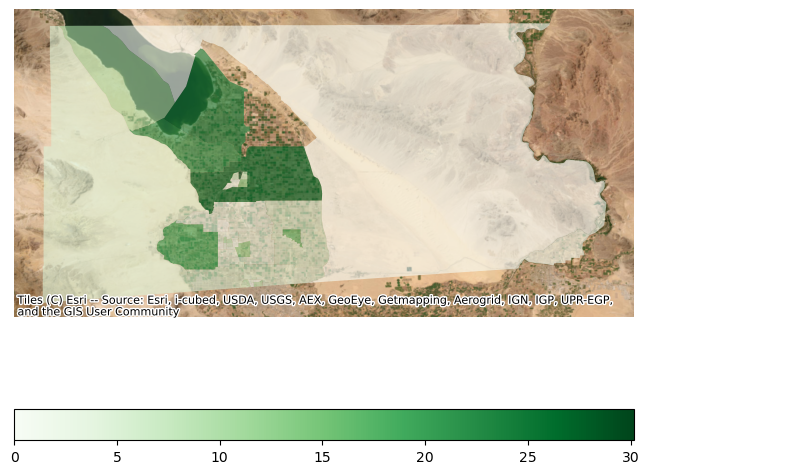

In [108]:
tracts_occupation = tracts_occupation.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
tracts_occupation.plot(ax=ax,
               column='Farming, Fishing, and Forestry Occupations',
               legend=True,
               cmap='Greens',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

(-116.1884411, -114.3807209, 32.5777133, 33.4745807)

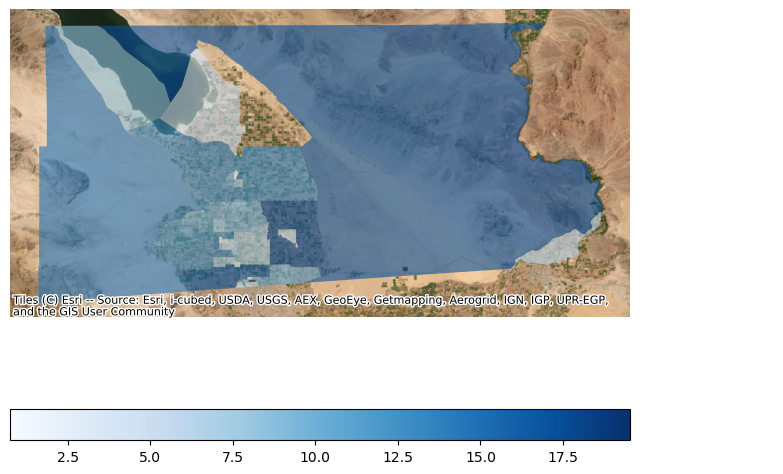

In [110]:
tracts_occupation = tracts_occupation.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
tracts_occupation.plot(ax=ax,
               column='Management, Business, and Financial Operations  Occupations',
               legend=True,
               cmap='Blues',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

In [111]:
columns_to_keep = ['Geo_FIPS',
                     'PCT_SE_A14001_002',
            'PCT_SE_A14001_003',
            'PCT_SE_A14001_004',
            'PCT_SE_A14001_005',
            'PCT_SE_A14001_006',
            'PCT_SE_A14001_007',
            'PCT_SE_A14001_008',
            'PCT_SE_A14001_009',
            'PCT_SE_A14001_010',
            'PCT_SE_A14001_011',
            'PCT_SE_A14001_012',
            'PCT_SE_A14001_013',
            'PCT_SE_A14001_014',
            'PCT_SE_A14001_015',
            'PCT_SE_A14001_016',
            'PCT_SE_A14001_017'
                  ]
# add it to a new dataframe
df3 = df[columns_to_keep] 

In [112]:
df3.columns = ['FIPS',   
            'Less than $10,000',
            '10,000 to 14,999',
            '15,000 to 19,999',
            '20,000 to 24,999',
            '25,000 to 29,999',
            '30,000 to 34,999',
            '35,000 to 39,999',
            '40,000 to 44,999',
            '45,000 to 49,999',
            '50,000 to 59,999',
            '60,000 to 74,999',
            '75,000 to 99,999',
            '100,000 to 124,999',
            '125,000 to 149,999',
            '150,000 to 199,999',
            '200,000 or More']


In [113]:
df3.head()

FIPS  Less than $10,000  10,000 to 14,999  15,000 to 19,999  \
0  06025010101              20.93             74.42              4.65   
1  06025010102              22.45             13.79              4.60   
2  06025010200               9.03              9.51              5.39   
3  06025010300               7.14              1.19              0.79   
4  06025010401               5.65             16.12              9.09   

   20,000 to 24,999  25,000 to 29,999  30,000 to 34,999  35,000 to 39,999  \
0              0.00              0.00              0.00              0.00   
1              0.84              5.90              0.77              9.04   
2              3.17              8.40             16.80              4.75   
3              4.76              7.54              3.57              7.94   
4             29.48              0.00              7.71              5.65   

   40,000 to 44,999  45,000 to 49,999  50,000 to 59,999  60,000 to 74,999  \
0              0.00              0.00              0.00              0.00   
1              3.07             14.25              8.51              4.67   
2              2.38              0.79              8.72              7.13   
3              2.78              1.19              2.38             17.06   
4              6.06              0.00             10.88              1.65   

   75,000 to 99,999  100,000 to 124,999  125,000 to 149,999  \
0              0.00                0.00                0.00   
1              3.52                6.82                1.76   
2              7.61                3.33                4.44   
3              9.52                7.94                7.14   
4              3.44                0.00                3.72   

   150,000 to 199,999  200,000 or More  
0                0.00             0.00  
1                0.00             0.00  
2                3.33             5.23  
3               11.51             7.54  
4                0.55             0.00

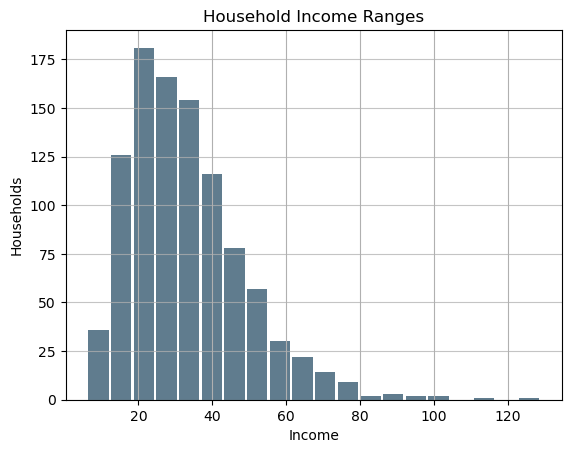

In [87]:
import numpy as np
size, scale = 1000, 10
df3 = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

df3.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Household Income Ranges')
plt.xlabel('Income')
plt.ylabel('Households')
plt.grid(axis='y', alpha=0.75)

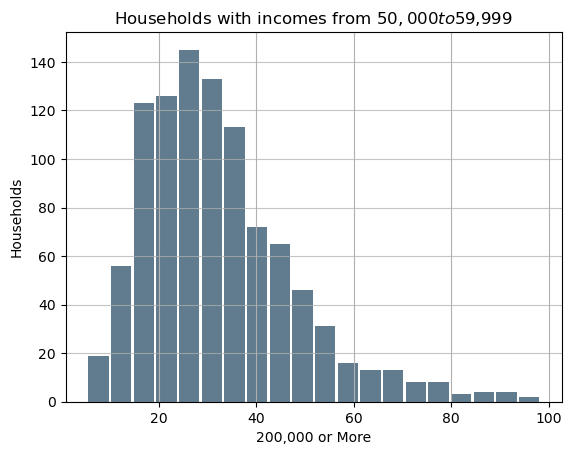

In [90]:
size, scale = 1000, 10
df3 = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

df3.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Households with incomes from $50,000 to $59,999')
plt.xlabel('200,000 or More')
plt.ylabel('Households')
plt.grid(axis='y', alpha=0.75)

In [76]:
tracts_income=tracts.merge(df3,on="FIPS")

(-116.98409285, -114.32948815, 32.5454098, 34.152954199999996)

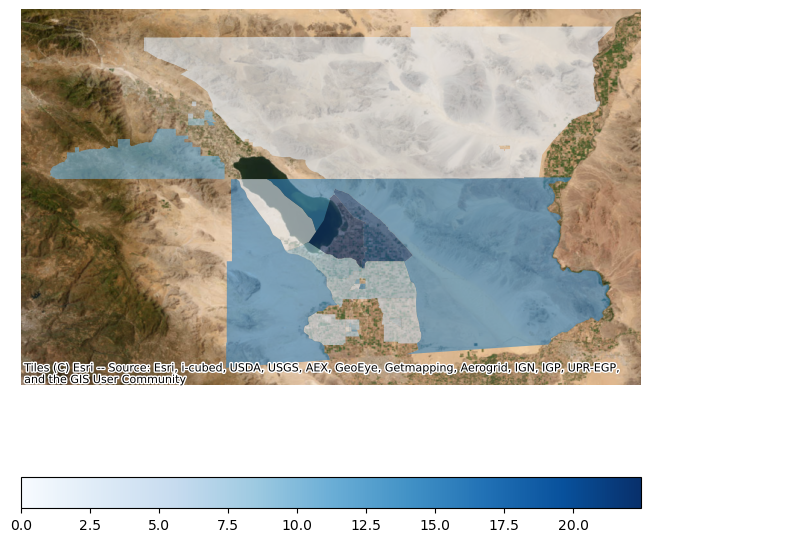

In [77]:
tracts_income = tracts_income.to_crs(epsg=4236)
fig,ax = plt.subplots(figsize=(8,8))
tracts_income.plot(ax=ax,
               column='Less than $10,000',
               legend=True,
               cmap='Blues',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )
ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )
ax.axis('off')

## Tiffany's Stuff

## Exploring the proportion of land that is considered to be in a drought in Imperial, San Diego & Riverside County
## Data was obtained from US Drought Monitoring System

First, I will import all the libraries I may need in the notebook

In [1]:
# import libraries
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import contextily as ctx

Next I upload my data, and inspect it to ensure that it has loaded properly.

In [3]:
countydf=pd.read_csv('data/Drought/2018_2022Drought.csv')
countydf.sample(10)

MapDate  FIPS            County State    None      D0      D1      D2  \
158  20200211  6025   Imperial County    CA  100.00    0.00    0.00    0.00   
179  20190917  6025   Imperial County    CA    9.55   90.45   31.87    0.00   
580  20220125  6073  San Diego County    CA    0.00  100.00  100.00    0.00   
305  20220426  6065  Riverside County    CA    0.00  100.00  100.00   69.36   
638  20201215  6073  San Diego County    CA    0.00  100.00    4.80    0.00   
44   20220419  6025   Imperial County    CA    0.00  100.00  100.00  100.00   
417  20200303  6065  Riverside County    CA  100.00    0.00    0.00    0.00   
507  20180612  6065  Riverside County    CA    0.00  100.00  100.00   98.14   
608  20210713  6073  San Diego County    CA    0.00  100.00  100.00   10.81   
364  20210309  6065  Riverside County    CA    0.00  100.00   99.94   54.49   

        D3   D4 ValidStart  ValidEnd  StatisticFormatID  
158   0.00  0.0    2/11/20   2/17/20                  1  
179   0.00  0.0    9/17/19   9/23/19                  1  
580   0.00  0.0    1/25/22   1/31/22                  1  
305   0.24  0.0    4/26/22    5/2/22                  1  
638   0.00  0.0   12/15/20  12/21/20                  1  
44    0.00  0.0    4/19/22   4/25/22                  1  
417   0.00  0.0     3/3/20    3/9/20                  1  
507  12.76  0.0    6/12/18   6/18/18                  1  
608   0.00  0.0    7/13/21   7/19/21                  1  
364  18.93  0.0     3/9/21   3/15/21                  1

I am now creating a function that contains three loops. First, I create a list of all unique values for my "County" column. Next, I will loop through each county name, and create a new data frame for each county containing values for the five levels of drought. Lastly, I will create a plot containing one drought level at a time.

In [4]:

def loop_plot(countydf,list_columns,countyname,x_axe):
    # returning a list of name of each county
    county = countydf[countyname].unique()
    # looping throuth each county name and create a new dataframe
    for x in county:
        x = countydf.loc[countydf[countyname] == x]
        # looping through the columns D0, D1 ... and plot line for each column
        for column in list_columns:
            x.plot(x=x_axe,y = column ,figsize=(10, 5), grid=True)

In order for my function to work, I must define list_columns. Here, I create a list of all the drought levels. In the next line, I instruct the function to plot the different drought levels by county, using the start date for that drought level as the x axis. The loop will yield 5 graphs for each county.

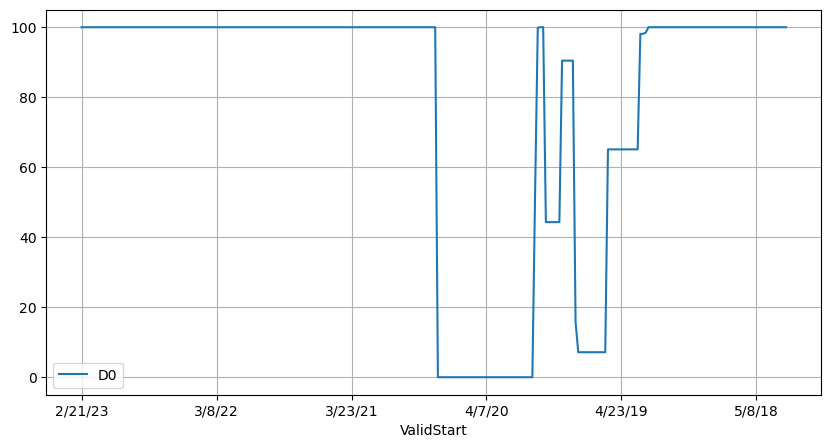

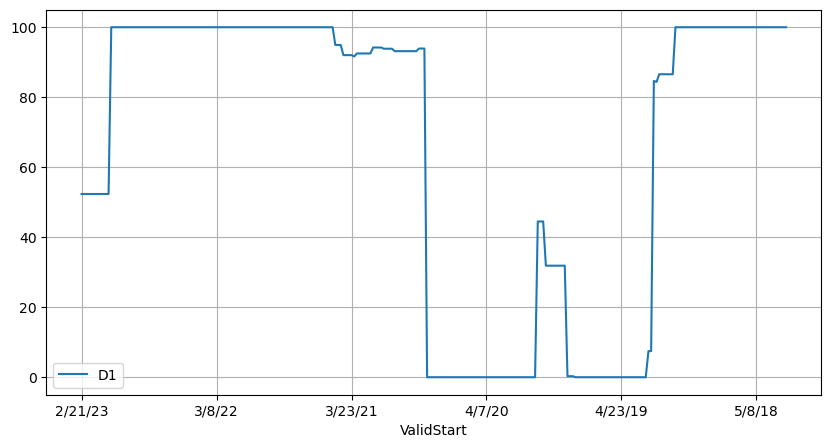

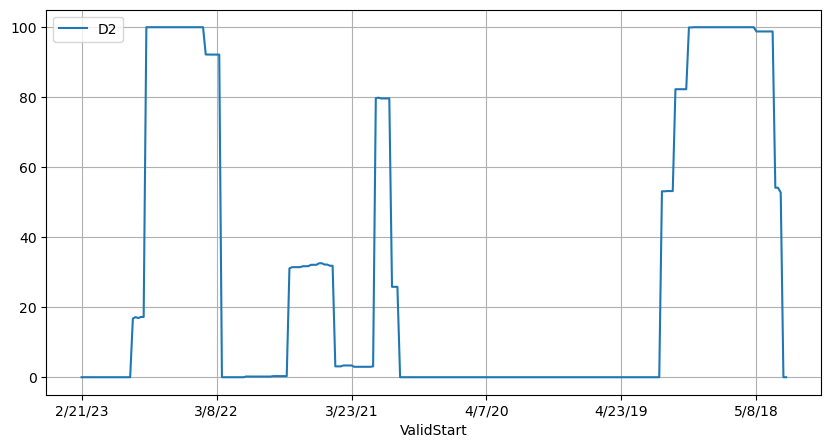

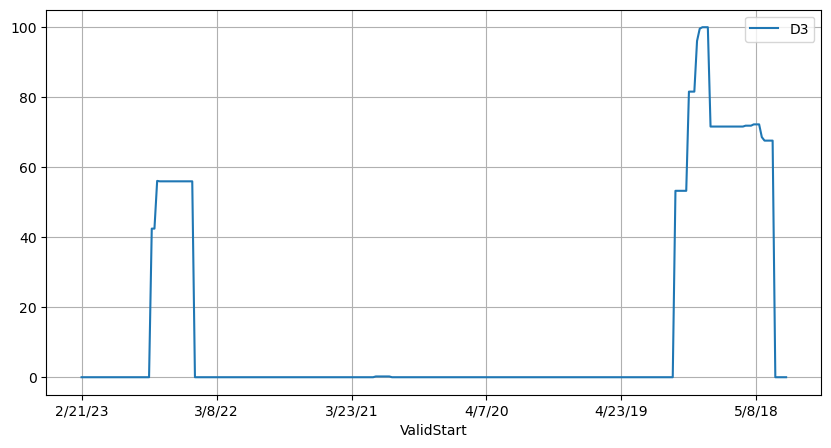

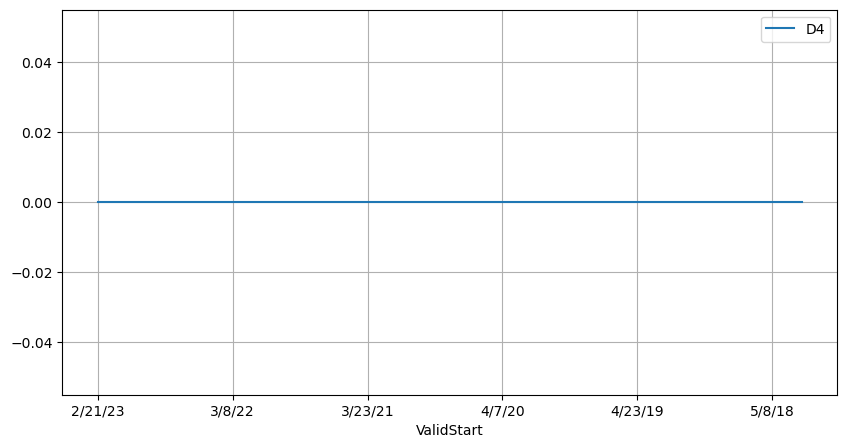

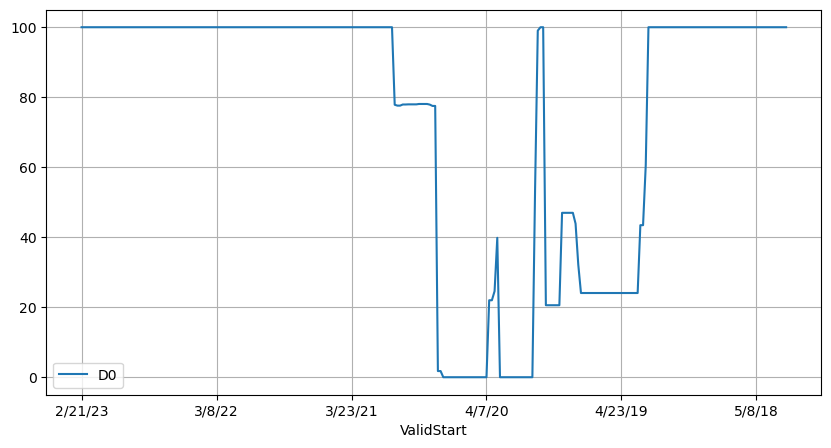

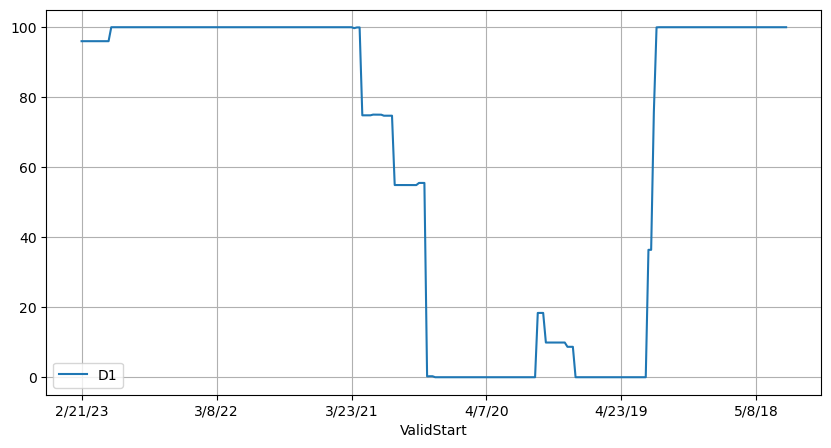

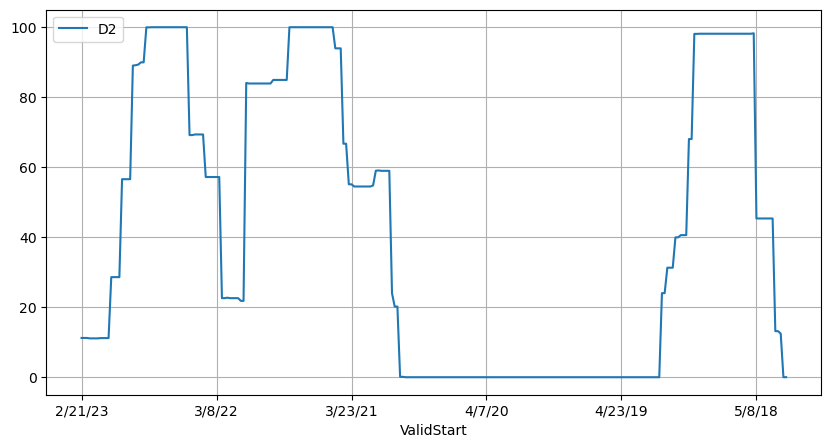

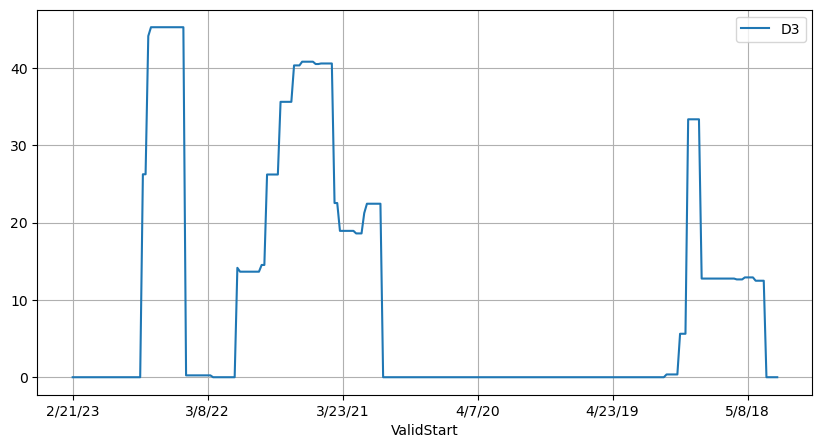

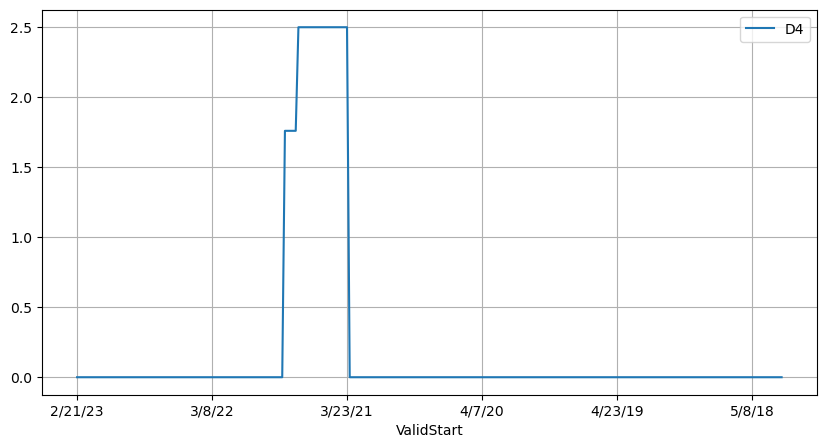

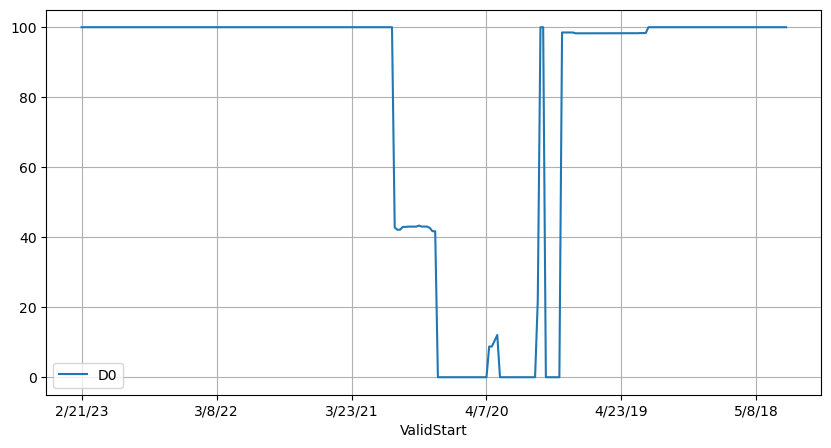

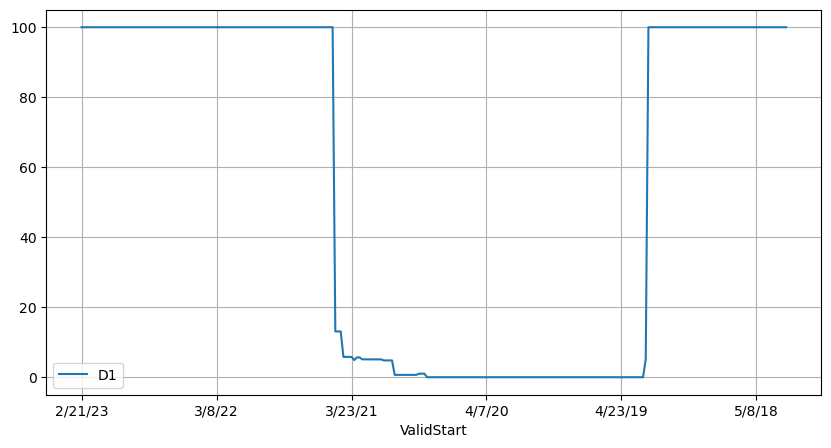

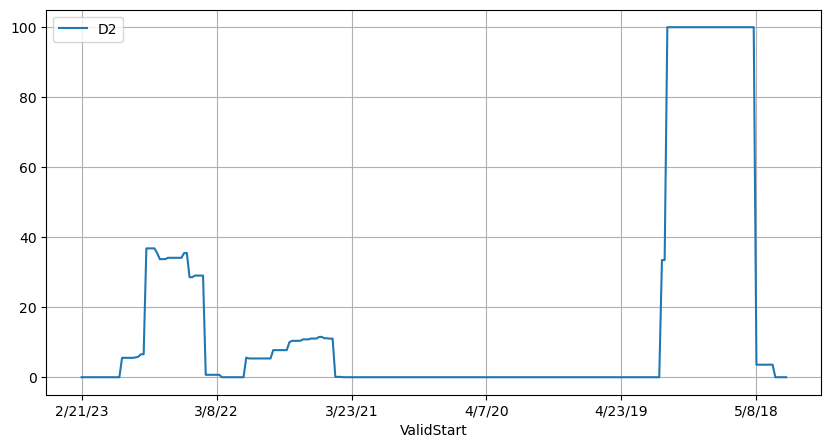

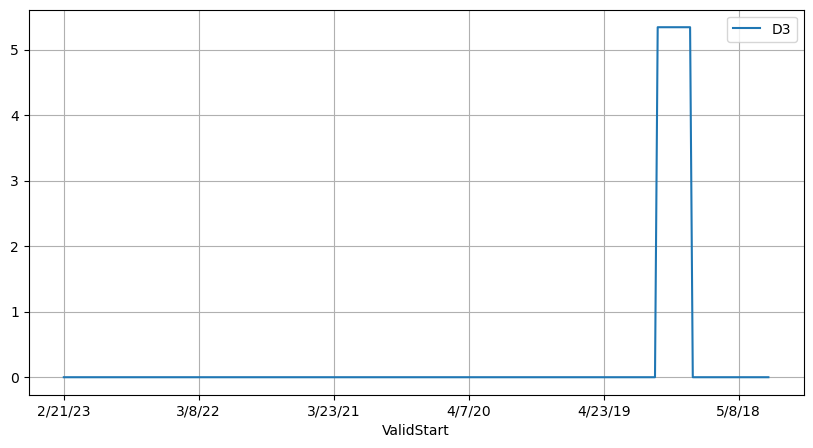

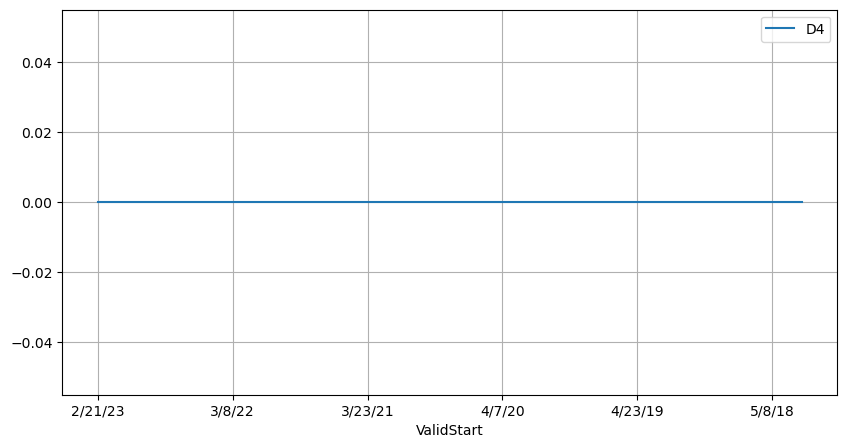

In [5]:
list_columns = ['D0','D1','D2','D3','D4']
loop_plot(countydf,list_columns,'County','ValidStart')